In [1]:
!pip install youtube_transcript_api

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
video=input("Enter the link of your YouTube Video: ")

Enter the link of your YouTube Video: https://www.youtube.com/watch?v=tXVNS-V39A0


In [ ]:
id_video=video.split("=")[1]
print(id_video)

tXVNS-V39A0


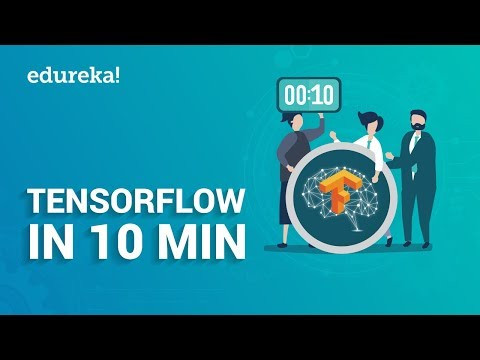

In [ ]:
YouTubeVideo(id_video)

In [ ]:
transcript = YouTubeTranscriptApi.get_transcript(id_video)

In [ ]:
transcript

[{'duration': 2.569,
  'start': 12.0,
  'text': 'Machine learning is\na complex discipline'},
 {'duration': 3.018,
  'start': 14.569,
  'text': 'but implementing machine\nlearning models is far'},
 {'duration': 1.713, 'start': 17.587, 'text': 'less daunting and difficult'},
 {'duration': 1.5, 'start': 19.3, 'text': 'than it used to be. Thanks'},
 {'duration': 3.3,
  'start': 20.8,
  'text': "to machine learning Frameworks\nsuch as Google's TensorFlow"},
 {'duration': 1.5, 'start': 24.1, 'text': 'that ease the process'},
 {'duration': 3.535,
  'start': 25.6,
  'text': 'of acquiring data, training model,\nsolving predictions'},
 {'duration': 2.565,
  'start': 29.135,
  'text': 'and refining future\nresults. Created by'},
 {'duration': 3.406,
  'start': 31.7,
  'text': 'the Google brain team tensorflow\nis an open source library'},
 {'duration': 1.494, 'start': 35.106, 'text': 'for numerical computation'},
 {'duration': 3.511,
  'start': 36.6,
  'text': 'and large scale machine learning.\

In [ ]:
doc = ""
for line in transcript:
    doc =doc+ ' ' + line['text']
print(type(doc))
print(doc)
#print(len(result))

<class 'str'>
 Machine learning is
a complex discipline but implementing machine
learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks
such as Google's TensorFlow that ease the process of acquiring data, training model,
solving predictions and refining future
results. Created by the Google brain team tensorflow
is an open source library for numerical computation and large scale machine learning.
Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make
them useful by way of common metaphor who will use machine learning
and all of its products to improve the search engine
the translation image captioning or the recommendations to give
you a concrete example, Google users can experience
a faster and more refined search with artificial intelligence. If the user types a keyword
in the search bar Google provides a recommendation about
what could be the next world not as a flow is being used

In [ ]:
doc=[]
for line in transcript:
  if "\n" in line['text']:
    x=line['text'].replace("\n"," ")
    doc.append(x)
  else:
    doc.append(line['text'])
print(doc)

['Machine learning is a complex discipline', 'but implementing machine learning models is far', 'less daunting and difficult', 'than it used to be. Thanks', "to machine learning Frameworks such as Google's TensorFlow", 'that ease the process', 'of acquiring data, training model, solving predictions', 'and refining future results. Created by', 'the Google brain team tensorflow is an open source library', 'for numerical computation', 'and large scale machine learning. Tensorflow bundles together', 'a study of machine learning', 'and deep learning models', 'and algorithms and make them useful by way', 'of common metaphor', 'who will use machine learning and all of its products', 'to improve the search engine the translation image captioning', 'or the recommendations to give you a concrete example,', 'Google users can experience a faster and more refined search', 'with artificial intelligence.', 'If the user types a keyword in the search bar Google', 'provides a recommendation about what c

In [ ]:
paragraph=" ".join(doc)
print(paragraph)

Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Created by the Google brain team tensorflow is an open source library for numerical computation and large scale machine learning. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. If the user types a keyword in the search bar Google provides a recommendation about what could be the next world not as a flow is being used by a lot of Co

#NLTK Summarization

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
mytext= paragraph

In [ ]:
stops = set(stopwords.words('english'))
word_array = word_tokenize(mytext)

wordfreq=dict()
for word in word_array:
  word=word.lower()
  if word in stops:
    continue
  elif word in wordfreq:
    wordfreq[word]+=1
  else:
    wordfreq[word]=1

#word_array
#frequencytable


In [ ]:
sent_array=sent_tokenize(mytext)

sentfreq=dict()
for sentence in sent_array:
  for word,freq in wordfreq.items():
    if word in sentence.lower():
      if sentence in sentfreq:
        sentfreq[sentence]+=freq
      else:
        sentfreq[sentence]=freq  

#sentfreq

In [ ]:
averageval=0
for sentence in sentfreq:
  averageval+=sentfreq[sentence]

average=int(averageval/len(sentfreq))

In [ ]:
summary=''
for sentence in sent_array:
  if(sentence in sentfreq) and (sentfreq[sentence]>(1.5*average)):
    summary=summary+" "+sentence
print(summary)

 Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. The Airbnb ingenious and data science team applies machine learning using tensorflow to classify the images and detect objects at scale helping to improve the guest experience and we talked about the healthcare industry using tensorflow GE Healthcare is training a neural network to identify specific anatomic during the brain MRI exam to help improve speed and reliability now PayPal is using it as a flow to stay at The 

#Spacy Summarization


In [ ]:
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'
#punctuation

In [ ]:
text=paragraph
space = spacy.load('en_core_web_sm')
doc= space(text)

In [ ]:
word_frequencies={}
for word in doc:
  if word.text.lower() not in stopwords:
      if word.text.lower() not in punctuation:
          if word.text not in word_frequencies.keys():
              word_frequencies[word.text] = 1
          else:
              word_frequencies[word.text] += 1

In [ ]:
max_frequency=max(word_frequencies.values())
for word in word_frequencies.keys():
  word_frequencies[word]=word_frequencies[word]/max_frequency

In [ ]:
sentence_tokens= [sent for sent in doc.sents]
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
      if word.text.lower() in word_frequencies.keys():
          if sent not in sentence_scores.keys():                            
            sentence_scores[sent]=word_frequencies[word.text.lower()]
          else:
            sentence_scores[sent]+=word_frequencies[word.text.lower()]
#sentence_scores  

In [ ]:
percent=int(input("How much percentage of summary you want? "))
ratio=(int(percent)) / 100
#ratio

How much percentage of summary you want? 30


In [ ]:
from heapq import nlargest
select_length=int(len(sentence_tokens)*ratio)
select_length
summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
summary

[Usually any machine learning or deep learning process has some similar steps, but in this case of terms of flow it is so simple any typical machine learning life Lord any process has some of the steps like collection of data set than building the model training the network evaluating the model and then predicting the outcome in case of tensorflow.,
 Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.,
 Each node in the graph represents a mathematical operation and each connection or Edge between the notes is a multi-dimensional data array or tensile test flow provides all of this for the programmer by way of the Python language by then is

In [ ]:
final_summary=[word.text for word in summary]
final_summary
summary=''.join(final_summary)
summary

"Usually any machine learning or deep learning process has some similar steps, but in this case of terms of flow it is so simple any typical machine learning life Lord any process has some of the steps like collection of data set than building the model training the network evaluating the model and then predicting the outcome in case of tensorflow.Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.Each node in the graph represents a mathematical operation and each connection or Edge between the notes is a multi-dimensional data array or tensile test flow provides all of this for the programmer by way of the Python language by then is easy 

#Translation


In [ ]:
!pip install deep-translator

     |████████████████████████████████| 97 kB 3.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!pip install googletrans

     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 1.3 MB 7.8 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=f407acd39a04b6a0542a956be963707eaea4a4aff70a6ff00d66377f7e47f428
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
import googletrans

In [ ]:
from deep_translator import GoogleTranslator
from deep_translator import MicrosoftTranslator

In [ ]:
print("CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:")
print(" ")
langdict=googletrans.LANGUAGES
for i in langdict :
    print(i+"-" +langdict[i])
srclang=input("ENTER LANGUAGE CODE: ")

CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:
 
af-afrikaans
sq-albanian
am-amharic
ar-arabic
hy-armenian
az-azerbaijani
eu-basque
be-belarusian
bn-bengali
bs-bosnian
bg-bulgarian
ca-catalan
ceb-cebuano
ny-chichewa
zh-cn-chinese (simplified)
zh-tw-chinese (traditional)
co-corsican
hr-croatian
cs-czech
da-danish
nl-dutch
en-english
eo-esperanto
et-estonian
tl-filipino
fi-finnish
fr-french
fy-frisian
gl-galician
ka-georgian
de-german
el-greek
gu-gujarati
ht-haitian creole
ha-hausa
haw-hawaiian
iw-hebrew
he-hebrew
hi-hindi
hmn-hmong
hu-hungarian
is-icelandic
ig-igbo
id-indonesian
ga-irish
it-italian
ja-japanese
jw-javanese
kn-kannada
kk-kazakh
km-khmer
ko-korean
ku-kurdish (kurmanji)
ky-kyrgyz
lo-lao
la-latin
lv-latvian
lt-lithuanian
lb-luxembourgish
mk-macedonian
mg-malagasy
ms-malay
ml-malayalam
mt-maltese
mi-maori
mr-marathi
mn-mongolian
my-myanmar (burmese)
ne-nepali
no-norwegian
or-odia
ps-pashto
fa-persian
pl-polish
pt-portuguese
pa-punjabi
ro-romanian
ru-russian
sm-samoan
gd-scots gae

In [ ]:
to_translate = summary
translated = GoogleTranslator(source='auto', target=srclang).translate(to_translate)
print("YOUR TRANSLATED SUMMARY IS GIVEN BELOW:")
print(" ")
print(translated)

YOUR TRANSLATED SUMMARY IS GIVEN BELOW:
 
आमतौर पर किसी भी मशीन लर्निंग या डीप लर्निंग प्रक्रिया में कुछ समान चरण होते हैं, लेकिन प्रवाह के मामले में यह इतना सरल है कि कोई भी विशिष्ट मशीन लर्निंग लाइफ लॉर्ड किसी भी प्रक्रिया में कुछ चरण होते हैं जैसे मॉडल के निर्माण से डेटा सेट का संग्रह नेटवर्क को प्रशिक्षित करना मॉडल का मूल्यांकन करना और फिर टेंसरफ़्लो के मामले में परिणाम की भविष्यवाणी करना। टेंसरफ़्लो एक साथ मशीन लर्निंग और डीप लर्निंग मॉडल और एल्गोरिदम का अध्ययन करता है और उन्हें सामान्य रूपक के माध्यम से उपयोगी बनाता है जो खोज को बेहतर बनाने के लिए मशीन लर्निंग और उसके सभी उत्पादों का उपयोग करेगा। आपको एक ठोस उदाहरण देने के लिए अनुवाद छवि कैप्शनिंग या अनुशंसाओं को इंजन करें, Google उपयोगकर्ता कृत्रिम बुद्धि के साथ एक तेज़ और अधिक परिष्कृत खोज का अनुभव कर सकते हैं। ग्राफ में प्रत्येक नोड एक गणितीय ऑपरेशन का प्रतिनिधित्व करता है और प्रत्येक कनेक्शन या नोट्स के बीच का किनारा एक बहु- आयामी डेटा सरणी या तन्यता परीक्षण प्रवाह प्रोग्रामर के लिए यह सब पाइथन भाषा के माध्यम से तब तक आसान टी

#Text To Speech

In [ ]:
!pip install gTTS

In [ ]:
!pip install pyttsx3  

In [ ]:
!pip install pygobject

In [ ]:
import gtts 

In [ ]:
print("Choose the below option:")
print(" ")
print("E for converting extracted summary to speech.\n" "T for converting translated summary to speech.\n" "B for converting both translated and extracted summary to speech.")
option=input("Enter your choice: ")

Choose the below option:
 
E for converting extracted summary to speech.
T for converting translated summary to speech.
B for converting both translated and extracted summary to speech.
Enter your choice: b


In [ ]:
if option=='E' or option=='e':
  speechtext=summary
  speech1=gtts.gTTS(speechtext)
  name1=input("Enter name of Extracted Summary file: ")
  speech1.save(name1+".mp3")

elif option=='T' or option=='t':
  speechtext=translated
  speech1=gtts.gTTS(speechtext)
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name2+".mp3")

elif option=='B' or option=='b':
  speechtext1=summary
  speechtext2=translated
  speech1=gtts.gTTS(speechtext1)
  speech2=gtts.gTTS(speechtext2)
  name1=input("Enter name of Extracted Summary file: ")
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name1+".mp3")
  speech2.save(name2+".mp3")

else:
  print("Invalid Option")

Enter name of Extracted Summary file: file1
Enter name of Translated Summary file: file2
